## A/B-test for a Kaggle dataset

### <font color='red'>The task is: </font>
Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they tun A/B tests, that is a randomized experimentation process wherein two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.

Would the campaign be successful?

### <font color='blue'>Let's complete it!</font>

### <font color='red'>1. Loading data </font>

In [3]:
# Base
# -----------------------------------
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Hypothesis Testing
# -----------------------------------
from scipy.stats import shapiro
import scipy.stats as stats

In [4]:
def load(path, info = True):
    
    import pandas as pd
    import io
    
    if len(path.split(".csv")) > 1:
        read = pd.read_csv(path)
    elif len(path.split(".xlsx")) > 1:
        read = pd.read_excel(path)
    
    if info:
        if len(read) > 0:
            print("# Data imported!")
            print("# ------------------------------------", "\n")
        
            print("# DIMENSIONS -------------------------")
            print("Observation:", read.shape[0], "Column:", read.shape[1], "\n")
    
            print("# DTYPES -----------------------------")
            if len(read.select_dtypes("object").columns) > 0:
                print("Object Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("object").columns), "\n", 
                      read.select_dtypes("object").columns.tolist(), "\n")
    
            if len(read.select_dtypes("integer").columns) > 0:
                print("Integer Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("integer").columns), "\n", 
                      read.select_dtypes("integer").columns.tolist(), "\n")
    
            if len(read.select_dtypes("float").columns) > 0:
                print("Float Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("float").columns), "\n", 
                      read.select_dtypes("float").columns.tolist(), "\n")
    
            if len(read.select_dtypes("bool").columns) > 0:
                print("Bool Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("bool").columns), "\n", 
                      read.select_dtypes("bool").columns.tolist(), "\n")
    
            print("# MISSING VALUE ---------------------")
            print("Are there any missing values? \n ", np.where(read.isnull().values.any() == False, 
                                                            "No missing value!", "Data includes missing value!"), "\n")
            
            buf = io.StringIO()
            read.info(buf=buf)
            info = buf.getvalue().split('\n')[-2].split(":")[1].strip()
            print("# MEMORY USAGE ---------------------- \n", info)
          
        else:
            print("# Data did not import!")
    
    return read

path="marketing_AB.csv"
data = load(path, info = True)
data.head()

# Data imported!
# ------------------------------------ 

# DIMENSIONS -------------------------
Observation: 588101 Column: 7 

# DTYPES -----------------------------
Object Variables: 
 # of Variables: 2 
 ['test group', 'most ads day'] 

Integer Variables: 
 # of Variables: 4 
 ['Unnamed: 0', 'user id', 'total ads', 'most ads hour'] 

Bool Variables: 
 # of Variables: 1 
 ['converted'] 

# MISSING VALUE ---------------------
Are there any missing values? 
  No missing value! 

# MEMORY USAGE ---------------------- 
 27.5+ MB


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


### <font color='red'>2. Check data properties </font>

There are just 6 columns, so it is quite easy to analyse its usability

Check if there are only unique users in the "user id" column

In [6]:
if len(data["user id"])==len(data["user id"].unique()):
    print("There are only unique users in the column")
else:
    print("There are NOT only unique users in the column")

There are only unique users in the column


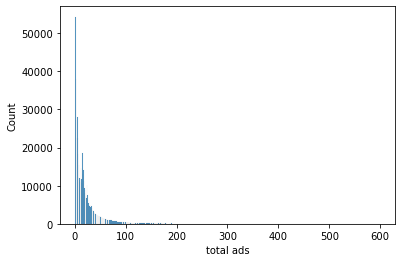

In [18]:
sns.histplot(data[data["test group"]=="ad"]['total ads'])
plt.show()

In [12]:
data.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["total ads"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
total ads,588101.0,24.820876,43.715181,1.0,1.0,1.0,2.0,3.0,13.0,33.0,57.0,88.0,202.0,2065.0


In [16]:
data=data[data["total ads"] < 700]
data.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["total ads"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
total ads,587772.0,24.398415,39.623898,1.0,1.0,1.0,2.0,3.0,13.0,33.0,56.0,87.0,196.0,599.0


In [175]:
data=data[data["total ads"] > 7]
data.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["total ads"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
total ads,367445.0,37.023565,45.648945,8.0,8.0,9.0,10.0,13.0,22.0,48.0,76.0,113.0,239.0,599.0


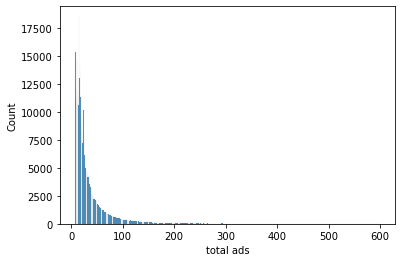

In [176]:
sns.histplot(data[data["test group"]=="ad"]['total ads'])
plt.show()

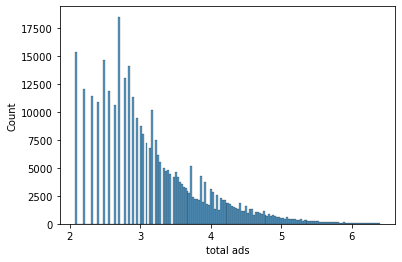

In [177]:
sns.histplot(np.log(data[data["test group"]=="ad"]['total ads']))
plt.show()

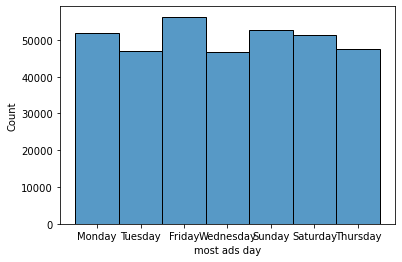

In [178]:
sns.histplot(data[data["test group"]=="ad"]['most ads day'])
plt.show()

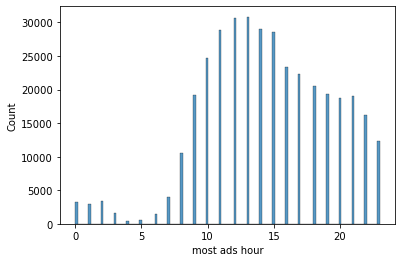

In [166]:
sns.histplot(data[data["test group"]=="ad"]['most ads hour'])
plt.show()

In [167]:
pr=len(data[(data["test group"]=="ad")&(data["converted"]==True)]['total ads'])/len(data[(data["test group"]=="ad")&(data["converted"]==False)]['total ads'])
print("Part of users, who bought after seeing advertisments are: ", round(pr,3))

Part of users, who bought after seeing advertisments are:  0.039


In [168]:
mask1=np.random.rand(len(data[(data["test group"]=="ad")&(data["converted"]==False)]['total ads']))<0.04
data_nc=data[(data["test group"]=="ad")&(data["converted"]==False)][mask1]

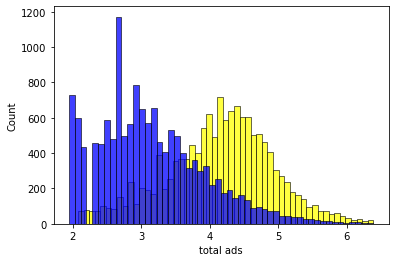

In [179]:
sns.histplot(np.log(data[(data["test group"]=="ad")&(data["converted"]==True)]['total ads']), color='yellow')
sns.histplot(np.log(data_nc['total ads']), color='blue')
plt.show()

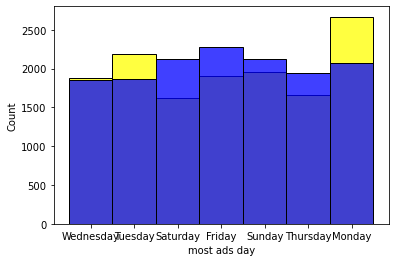

In [170]:
sns.histplot(data[(data["test group"]=="ad")&(data["converted"]==True)]['most ads day'], color='yellow')
sns.histplot(data_nc['most ads day'], color='blue')
plt.show()

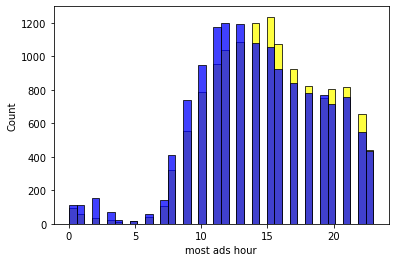

In [171]:
sns.histplot(data[(data["test group"]=="ad")&(data["converted"]==True)]['most ads hour'], color='yellow')
sns.histplot(data_nc['most ads hour'], color='blue')
plt.show()

In [180]:
data_group=data[data["test group"]=="ad"].groupby("total ads")["converted"].mean()
CAC=np.zeros(len(data_group))
k=0
for i in data_group.index:
    CAC[k]=data_group[i]/i
    k+=1

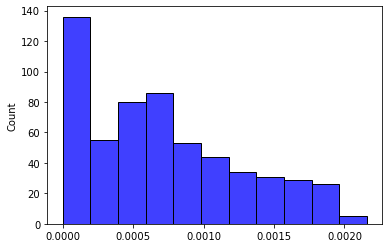

In [181]:
sns.histplot(np.log(CAC+1), color='blue')
plt.show()

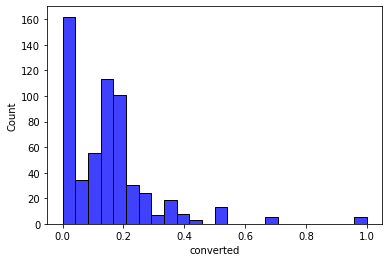

In [182]:
sns.histplot(data[data["test group"]=="ad"].groupby("total ads")["converted"].mean(), color='blue')
plt.show()

### <font color='red'>3. A/A-test </font>

According to the histogram, it is possible to use 5 features for A/B-test. But, first of all, let's check whether these features and their numbers (which were given in the task(len of "psa")) are suitable for A/B-test. And for this aim the A/A test will be useful

A/A-test helps us to find out the right metrics and estimate the representation of the sample. In our case in data there are already two groups without data before the experiment. That is why let's just imitate A/A experiment. We will take just one group and divide it by two and analyze the illustrated metrics

In [189]:
pr=len(data[data["test group"]=="psa"]['total ads'])/len(data[data["test group"]=="ad"]['total ads'])
print("Part of samples for A/B-testing is: ", round(pr,3))

Part of samples for A/B-testing is:  0.039


In [231]:

def get_pvalue_total_ads(data):
    mask1=np.random.rand(len(data))<0.08
    ar=data[mask1]
    mask2=np.random.rand(len(ar))<0.5
    AA_1=ar[mask2]
    AA_2=ar[~mask2]
    
    return mannwhitneyu(AA_1, AA_2)[1]


def get_pvalue_total_ads_2(data):
    mask2=np.random.rand(len(data))<0.5
    AA_1=data[mask2]
    AA_2=data[~mask2]
    
    return mannwhitneyu(AA_1, AA_2)[1]

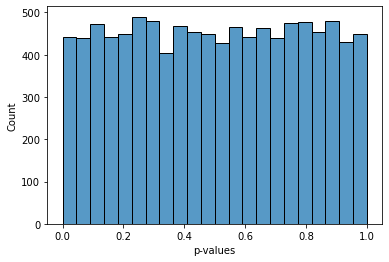

In [124]:
d=np.log(data[data["test group"]=="ad"]['total ads'])
pvalues=[get_pvalue_total_ads(d) for _ in range(10000)]
sns.histplot(pvalues)
plt.xlabel("p-values")
plt.show()

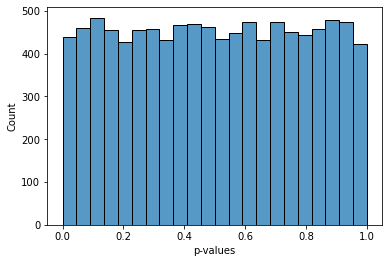

In [125]:
d=data[data["test group"]=="ad"]['most ads hour']
pvalues=[get_pvalue_total_ads(d) for _ in range(10000)]
sns.histplot(pvalues)
plt.xlabel("p-values")
plt.show()

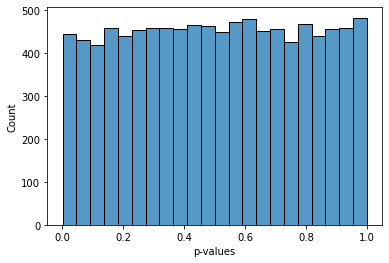

In [127]:
d=np.log(data[(data["test group"]=="ad")&(data["converted"]==True)]['total ads'])
pvalues=[get_pvalue_total_ads(d) for _ in range(10000)]
sns.histplot(pvalues)
plt.xlabel("p-values")
plt.show()

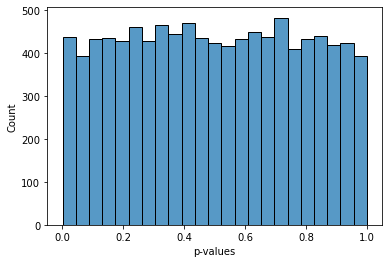

In [232]:
mask1=np.random.rand(len(data[data["test group"]=="ad"]["total ads"]))<0.08
ar=data[data["test group"]=="ad"][mask1]
d=ar.groupby("total ads")["converted"].mean()
pvalues=[get_pvalue_total_ads_2(d) for _ in range(10000)]
sns.histplot(pvalues)
plt.xlabel("p-values")
plt.show()

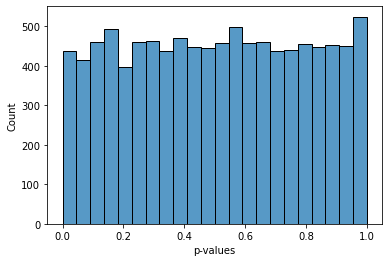

In [233]:
data_group=data[data["test group"]=="ad"].groupby("total ads")["converted"].mean()
CAC=np.zeros(len(data_group))
k=0
for i in data_group.index:
    CAC[k]=data_group[i]/i
    k+=1
d=np.log(CAC+1)
pvalues=[get_pvalue_total_ads(d) for _ in range(10000)]
sns.histplot(pvalues)
plt.xlabel("p-values")
plt.show()

### <font color='red'>4. A/B-test </font>

In [190]:
mask1=np.random.rand(len(data[data["test group"]=="ad"]))<0.039
data_groupA=data[data["test group"]=="ad"][mask1]
data_groupB=data[data["test group"]=="psa"]

In [213]:
def AB_Test(data_A, data_B):
    
    # Assumption: Normality
    ndA = shapiro(data_A)[1] >= 0.05
    ndB = shapiro(data_B)[1] > 0.05
    # H0: Distribution is Normal! - True
    # H1: Distribution is not Normal! - False
    
    if (ndA == True)&(ndB == True): 
        # Test based on homogeneity for normal distribution
        # Assumption: Homogeneity of variances
        leveneTest = stats.levene(data_A, data_B)[1] > 0.05
        
        if leveneTest == True:
            # Homogeneity
            ttest = stats.ttest_ind(data_A, data_B, equal_var=True)[1]
        else:
            # Heterogeneous
            ttest = stats.ttest_ind(data_A, data_B, equal_var=False)[1]
    else:
        # Non-Parametric Test
        ttest = stats.mannwhitneyu(data_A, data_B)[1] 
        
    result = pd.DataFrame({
        "AB Hypothesis":[ttest > 0.05], 
        "p-value":[ttest]
    })
    
    return result

In [214]:
AB_Test(np.log(data_groupA['total ads']), np.log(data_groupB['total ads']))

C:\Users\User\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,AB Hypothesis,p-value
0,False,2.956282e-07


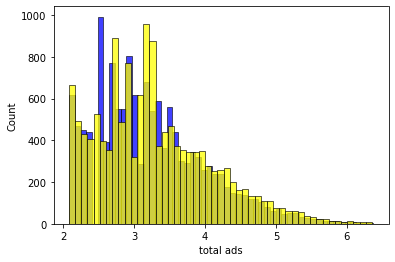

In [215]:
sns.histplot(np.log(data_groupA['total ads']), color='blue')
sns.histplot(np.log(data_groupB['total ads']), color='yellow')
plt.show()

In [216]:
AB_Test(np.log(data_groupA[data_groupA["converted"]==True]['total ads']), np.log(data_groupB[data_groupB["converted"]==True]['total ads']))

,AB Hypothesis,p-value
0,True,0.1791


### This feature doesn't show significant difference! 

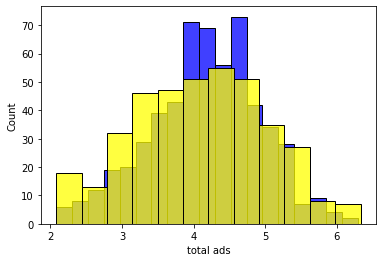

In [217]:
sns.histplot(np.log(data_groupA[data_groupA["converted"]==True]['total ads']), color='blue')
sns.histplot(np.log(data_groupB[data_groupB["converted"]==True]['total ads']), color='yellow')
plt.show()

In [218]:
AB_Test(data_groupA['most ads hour'], data_groupB['most ads hour'])

C:\Users\User\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,AB Hypothesis,p-value
0,False,0.000003


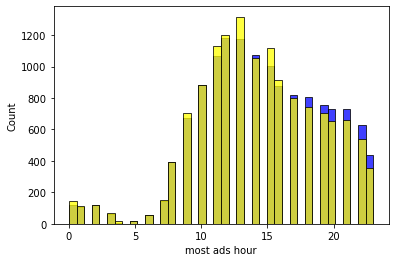

In [219]:
sns.histplot(data_groupA['most ads hour'], color='blue')
sns.histplot(data_groupB['most ads hour'], color='yellow')
plt.show()

In [220]:
AB_Test(data_groupA.groupby("total ads")["converted"].mean(), data_groupB.groupby("total ads")["converted"].mean())

,AB Hypothesis,p-value
0,False,0.005417


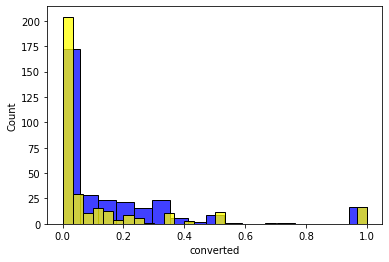

In [221]:
sns.histplot(data_groupA.groupby("total ads")["converted"].mean(), color='blue')
sns.histplot(data_groupB.groupby("total ads")["converted"].mean(), color='yellow')
plt.show()

In [222]:
d1=data_groupA.groupby("total ads")["converted"].mean()
CAC_A=np.zeros(len(d1))
k=0
for i in d1.index:
    CAC_A[k]=d1[i]/i
    k+=1
d_A=CAC_A

In [223]:
d2=data_groupB.groupby("total ads")["converted"].mean()
CAC_B=np.zeros(len(d2))
k=0
for i in d2.index:
    CAC_B[k]=d2[i]/i
    k+=1
d_B=CAC_B

In [224]:
AB_Test(d_A, d_B)

,AB Hypothesis,p-value
0,False,0.000162


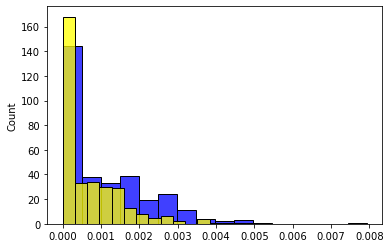

In [225]:
sns.histplot(d_A, color='blue')
sns.histplot(d_B, color='yellow')
plt.show()

## Yes! A/B-test is showing that adverticement was useful!